# NetCDF Sample Dataset Exploration
Re-familarize with NetCDF, make plots with sample datset  

In [45]:
# Import libraries
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

In [138]:
# read dataset and print dataset summary
data = nc.Dataset("../data/snw.SNODAS.mon.nam-44i_hl.2003-2019.nc", "r")
data.variables

{'snw': <class 'netCDF4._netCDF4.Variable'>
 float32 snw(time, latitude, longitude)
     _FillValue: -9999.0
     _FillValue_original: -9999
     cell_methods: time:snapshot at 06:00UTC time: mean
     grid_mapping: crs
     long_name: snow water equivalent
     standard_name: snow_water_equivalent
     units: mm
     missing_value: -9999.0
 unlimited dimensions: time
 current shape = (192, 129, 300)
 filling on,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float32 time(time)
     cell_methods: time: mean
     axis: T
     calendar: standard
     units: hours since 2003-01-01
     bounds: time_bnds
     standard_name: time
 unlimited dimensions: time
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (129,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': 

In [139]:
print(f"There are {len(data['time'])} observations in the small nc file")
time_sample = data["time"][:].data[-1]
time_sample
starttime = dt.date(year=2003, month=1, day=1)
lasttime = starttime+ dt.timedelta(hours=int(time_sample)) # get sample date
print(f"The samples end on {lasttime}")


There are 192 observations in the small nc file
The samples end on 2019-12-16


In [140]:
# extract data
x = data["longitude"][:]
y = data["latitude"][:]
snw = data["snw"][:]

In [57]:
counter=0
ind = 10
for elt in snw[ind].data:
    for val in elt:
        if val != -9999.:
            counter +=1
print(counter)

3338


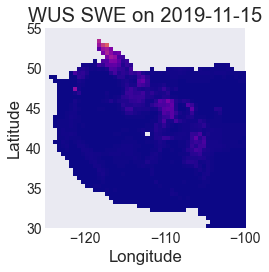

In [272]:
X, Y = np.meshgrid(x, y)

# get subset so we  can zoom on graph
latbounds = [30 , 55]
lonbounds = [-125 , -100]

# latitude lower and upper index
lat_lower = np.argmin(np.abs(y - latbounds[0]))
lat_upper = np.argmin(np.abs(y - latbounds[1])) 

# longitude lower and upper index
lon_lower = np.argmin(np.abs(x - lonbounds[0]))
lon_upper = np.argmin(np.abs(x - lonbounds[1]))

# colormap - color NaNs gray, select nicer plot style
#current_cmap = plt.cm.get_cmap('Accent') #plt.style.available to find avaiable images
current_cmap.set_bad(color='gray')
plt.style.use('seaborn-dark')

for index in range(0,191):
    #  plot selected indices, specify bounds, choose colorscheme, specify color bounds
    plt.imshow(snw[index][lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=plt.get_cmap("plasma"), aspect="equal",vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))
    im_date = starttime + dt.timedelta(hours=int(data["time"][:][index]))
    plt.title(f"WUS SWE on {im_date}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.savefig(f"../plots/sample_dset_daily/sample_snow_{im_date}.png",bbox_inches='tight', dpi=200)

In [273]:
# construct gif
import imageio
images = []
import os
# get filenames
filenames = os.listdir("../plots/sample_dset_daily")
filenames.remove(".DS_Store")
filenames = [os.path.join("../plots/sample_dset_daily/", f) for f in filenames]

# order images
order = np.argsort([dt.datetime.strptime(os.path.basename(d).split("_")[-1][0:-4],'%Y-%m-%d') 
                     for d in filenames])
print(len(order))
print(len(filenames))

filenames = np.array(filenames)[order]

print(f"Creating GIF from {len(filenames)} separate measurements!")
for filename in filenames:
    try:
        images.append(imageio.imread(filename))
    except:
        print(filename)
imageio.mimsave("../sample_dset_small_sat_movie.gif", images, duration=0.5)

191
191
Creating GIF from 191 separate measurements!


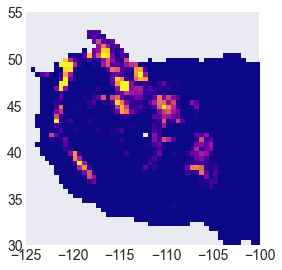

In [274]:
# determine what's a good saturation level - settled on 500 mm 
plt.imshow(snw[15][lat_lower:lat_upper, lon_lower:lon_upper],  origin='lower', 
               cmap=plt.get_cmap("plasma"), aspect="equal", vmin=0, vmax=500,
               extent=(lonbounds[0], lonbounds[1], latbounds[0], latbounds[1]))